In [50]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import poisson

import pylab
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import time
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from xgboost.sklearn import XGBClassifier
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn import preprocessing


from lightgbm import LGBMClassifier
import time

from sklearn.metrics import classification_report, confusion_matrix


from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np

from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import PCA, IncrementalPCA
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.linear_model import RidgeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, svm


In [51]:
print("Start : %s\n" % time.ctime())

X = pd.read_csv("./MLinTheUnknown-Data/X_train.csv", header=None)
y = pd.read_csv("./MLinTheUnknown-Data/y_train.csv", header=None)

X_val = pd.read_csv("./MLinTheUnknown-Data/X_val.csv", header=None)
y_val = pd.read_csv("./MLinTheUnknown-Data/y_val.csv", header=None)

X_test = pd.read_csv("./MLinTheUnknown-Data/X_test.csv", header=None)

print("Stop : %s\n" % time.ctime())

Start : Wed Apr 28 06:25:59 2021

Stop : Wed Apr 28 06:26:00 2021



In [52]:
chi2=[10,8,66,67,64,2,3,83,115,59,74,91,75,72,0,51,76,124,82,11,68,90,84,114,58,122,50,4,116,18,92,17,81,112,106]


gini=[3,8,9,11,15,16,19,24,30,33,35,37,57,66,68,69,74,75,77,78,80,81,83,88,91,92,96,97,100,104,112,113,115,123,124]


corr =[0,4,5,6,7,8,12,13,14,15,16,17,18,19,20,21,22,25,27,30,34,35,51,68,70,96,97,98,99,100,101,102]

In [6]:
# abc = gini[:2]
# abc

[3, 8]

In [42]:

# 1
def KNN(X, y, X_val, y_val, X_test, del_index):
    
    X_train = X[del_index]
    X_val = X_val[del_index]

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()
    
    #KNN -classifier
    clf_knn = KNeighborsClassifier(
            n_neighbors = 1, 
            weights = 'uniform', 
            leaf_size =5,
            algorithm = 'auto',
            p=1)
    
    clf_knn.fit(X_train, y_train)
    y_pred_knn= clf_knn.predict(X_val)
    f1_knn= f1_score(y_val, y_pred_knn, average='weighted')
    f1_knn =  round(f1_knn,5)
    return f1_knn

# 2
def RF(X, y, X_val, y_val, X_test, del_index):
    X_train = X[del_index]
    X_val = X_val[del_index]

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)
    
    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()

    clf_rf = RandomForestClassifier(n_estimators = 160, 
                                    criterion='gini', 
                                    min_samples_leaf= 1, 
                                    max_features = 'auto',
                                    min_samples_split =2,
                                    random_state= 0
                                   )
    
    clf_rf.fit(X_train, y_train)

    y_pred_rf = clf_rf.predict(X_val)
    f1_rf= f1_score(y_val, y_pred_rf, average='weighted')
    f1_rf= round(f1_rf,5)
    return f1_rf

# 3
def extraTree(X, y, X_val, y_val, X_test, del_index):
    
    X_train = X[del_index]
    X_val = X_val[del_index]

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)
    
    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()
      
    clf_etc = ExtraTreesClassifier( criterion = 'gini',
                                   max_features = 'auto',
                                   random_state=0
                                  )
    clf_etc.fit(X_train, y_train)
    y_pred_etc = clf_etc.predict(X_val)

    f1_etc= f1_score(y_val, y_pred_etc, average='weighted')
    f1_etc =round(f1_etc,5)
    return f1_etc

# 4
def xgboost(X, y, X_val, y_val, X_test, del_index):
    
    X_train = X[del_index]
    X_val = X_val[del_index]
    
    
    X_train = np.array(X_train)
    X_val = np.array(X_val)
    y_train =np.array(y).ravel()
    y_val =np.array(y_val).ravel()
    # 归一化
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    Validation = True
    if Validation == True:
        model = xgb.XGBClassifier(
                max_depth=7,
                learning_rate=0.05,
                n_estimators=1000,
 
                silent=True,
                objective='multi:softmax',
        )

        model.fit(X_train,y_train)
        y_pred_xgb = model.predict(X_val)
        f1_xgb = f1_score(y_val, y_pred_xgb, average='weighted')
        f1_xgb = round(f1_xgb, 5)
        
    return f1_xgb

# 5
def Light_gbm(X, y, X_val, y_val, X_test, del_index):
    
    X_train = X[del_index]
    X_val = X_val[del_index]

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()
    
    gbm = LGBMClassifier(
       num_leaves=31,
        max_depth = -1, 
        learning_rate=0.1,
        n_estimators= 120, 
        silent = True,
        objective = 'multiclass' )
    
    gbm.fit(X_train,y_train)
    y_pred_gbm = gbm.predict(X_val, num_iteration=46)
    f1_gbm = f1_score(y_val, y_pred_gbm, average='weighted')
    f1_gbm =round(f1_gbm,5)
    
    return f1_gbm

# 6
def GradientBoosting(X, y, X_val, y_val, X_test, del_index):
    
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(X)
    Xval = scaler.transform(X_val)
    
    Xtrain =pd.DataFrame(Xtrain)
    Xval = pd.DataFrame(Xval)
    
    Xtrain = Xtrain[del_index]
    Xval = Xval[del_index]
    
    
    
    y= np.array(y).ravel()
    y_val = np.array(y_val).ravel()
    
    
    Xtrain = np.array(Xtrain)
    Xval = np.array(Xval)

    
    
    clf = GradientBoostingClassifier(n_estimators=150)
    clf.fit(Xtrain, y)
    
    pred_y_val = clf.predict(Xval)
   

    f1_gb = f1_score(y_val, pred_y_val, average='weighted')
    f1_gb = round(f1_gb, 5)
   
    return f1_gb


# 7
def Bagging(X, y, X_val, y_val, X_test, del_index):
    X_train = X[del_index]
    X_val = X_val[del_index]
    

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_val = min_max_scaler.transform(X_val)

    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()
    
    bagging_model = BaggingClassifier(
        base_estimator= ExtraTreeClassifier(criterion = 'entropy',max_features = 'auto',random_state=0),
        n_estimators = 170,
        max_samples = 6400,
        random_state = 20
    )  
    bagging_model.fit(X_train, y_train )
    y_pred_bag = bagging_model.predict(X_val)
    
    f1_bag= f1_score(y_val, y_pred_bag, average='weighted')
    f1_bag = round(f1_bag,5)
    
    return f1_bag


# 8
def ada_classifier(X, y, X_val, y_val, X_test, del_index): # Adaboost
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X)
    X_val = scaler.transform(X_val)
    

    X_train = pd.DataFrame(X_train)
    X_val = pd.DataFrame(X_val)
    
    
    X_train = X_train[del_index]
    X_val = X_val[del_index]
    
    
    X_train = np.array(X_train)
    X_val =np.array(X_val)
    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()
    
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=12), n_estimators=150)
    clf.fit(X_train, y_train)
    y_pred_val = clf.predict(X_val)
    
    f1_ada = f1_score(y_val, y_pred_val, average='weighted')
    f1_ada = round(f1_ada,5)
    
    return f1_ada
  
# 9
def scv_classifier(X, y, X_val, y_val, X_test, del_index):   # SVM method
    # normalization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X) 
    X_val = scaler.transform(X_val)
    
    X_train = pd.DataFrame(X_train)
    X_val = pd.DataFrame(X_val)
    
    
    X_train = X_train[del_index]
    X_val = X_val[del_index]
    
    
    X_train = np.array(X_train)
    X_val =np.array(X_val)
    y_train = np.array(y).ravel()
    y_val = np.array(y_val).ravel()
    
    
    # train
    svc = svm.SVC(C=2.0)
    svc.fit(X_train, y_train)

    y_pred_val = svc.predict(X_val)
    f1_svm = f1_score(y_val, y_pred_val, average='weighted')
    f1_svm = round(f1_svm,5)
    return f1_svm

# 10
def lr_classfier(X, y, X_val, y_val, X_test, del_index): 
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(X)
    X_val = scaler.transform(X_val)
    
    
    Xtrain =pd.DataFrame(Xtrain)
    Xval = pd.DataFrame(X_val)
    
    Xtrain = Xtrain[del_index]
    Xval = Xval[del_index]
    
    
    
    y= np.array(y).ravel()
    y_val = np.array(y_val).ravel()
    
    
    Xtrain = np.array(Xtrain)
    Xval = np.array(Xval)
   
   
    

    clf = LogisticRegression(C=10.1,solver = 'newton-cg', max_iter=500)

    clf.fit(X, y)

    pred_val_y = clf.predict(X_val)
    
    f1_lr = f1_score(y_val, pred_val_y, average='weighted')
    f1_lr =  round(f1_lr,5)
    
    return f1_lr



In [13]:

#  for gini


gini_knn = []
gini_randomForest =[]

gini_extratree =[]
gini_xgboost=[]

gini_light_gbm =[]
gini_gradientBoosting = []

gini_bagging= []
gini_adaboost = []

gini_svm = []
gini_logistic_regression = []

for i in range(1, len(gini)):
    gini_temp = gini[:i]
    
    f1 = KNN(X, y, X_val, y_val, X_test, gini_temp)
    gini_knn.append(f1)

In [15]:
print(gini_knn)

[0.36389, 0.69603, 0.802, 0.89126, 0.91069, 0.95827, 0.97733, 0.98131, 0.98238, 0.9831, 0.98525, 0.98813, 0.98813, 0.99137, 0.99209, 0.99138, 0.99209, 0.9921, 0.99138, 0.99174, 0.99209, 0.99209, 0.99245, 0.99245, 0.99353, 0.99281, 0.99353, 0.99353, 0.99353, 0.9946, 0.99388, 0.99352, 0.99388, 0.99424]


In [16]:
for i in range(1, len(gini)):
    gini_temp = gini[:i]
    f2 = RF(X, y, X_val, y_val, X_test, gini_temp)
    gini_randomForest.append(f2) 
print("====================")

In [17]:
for i in range(1, len(gini)):
    gini_temp = gini[:i]
    f3 =extraTree(X, y, X_val, y_val, X_test, gini_temp)
    gini_extratree.append(f3) 
print("====================")

In [18]:
for i in range(1, len(gini)):
    gini_temp = gini[:i]
    f4 = xgboost(X, y, X_val, y_val, X_test, gini_temp)
    gini_xgboost.append(f4)
print("====================")

In [19]:
for i in range(1, len(gini)):
    gini_temp = gini[:i]
    f5 = Light_gbm(X, y, X_val, y_val, X_test, gini_temp)
    gini_light_gbm.append(f5)
print("====================")

In [22]:
for i in range(1, len(gini)):
    gini_temp = gini[:i]
    f6 = GradientBoosting(X, y, X_val, y_val, X_test, gini_temp)
    gini_gradientBoosting.append(f6)  
print("====================")

In [23]:
for i in range(1, len(gini)):
    gini_temp = gini[:i]
    f7 =Bagging(X, y, X_val, y_val, X_test, gini_temp)
    gini_bagging.append(f7)
print("====================")

In [25]:
for i in range(1, len(gini)):
    gini_temp = gini[:i]
    f8 = ada_classifier(X, y, X_val, y_val, X_test, gini_temp)
    gini_adaboost.append(f8)
print("====================")

In [26]:
for i in range(1, len(gini)):
    gini_temp = gini[:i]
    f9 = scv_classifier(X, y, X_val, y_val, X_test, gini_temp)
    gini_svm.append(f9)
print("====================")


In [43]:
gini_logistic_regression_iteration = []

for i in range(1, len(gini)):
    gini_temp = gini[:i]
    f10 = lr_classfier(X, y, X_val, y_val, X_test, gini_temp)
    gini_logistic_regression_iteration.append(f10)
print("====================")

/opt/anaconda3/envs/COMP9444/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/COMP9444/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/COMP9444/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/COMP9444/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/COMP9444/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg fa

/opt/anaconda3/envs/COMP9444/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [31]:
print(gini_knn)

[0.36389, 0.69603, 0.802, 0.89126, 0.91069, 0.95827, 0.97733, 0.98131, 0.98238, 0.9831, 0.98525, 0.98813, 0.98813, 0.99137, 0.99209, 0.99138, 0.99209, 0.9921, 0.99138, 0.99174, 0.99209, 0.99209, 0.99245, 0.99245, 0.99353, 0.99281, 0.99353, 0.99353, 0.99353, 0.9946, 0.99388, 0.99352, 0.99388, 0.99424]


In [32]:
print(gini_randomForest)

[0.36461, 0.72012, 0.86403, 0.91585, 0.9213, 0.96104, 0.97404, 0.97767, 0.98058, 0.98454, 0.98742, 0.98706, 0.98778, 0.99065, 0.98922, 0.98993, 0.98921, 0.99065, 0.99065, 0.98921, 0.99101, 0.99029, 0.99029, 0.98884, 0.98957, 0.98956, 0.98884, 0.98849, 0.99101, 0.99029, 0.99029, 0.99065, 0.99101, 0.99029]


In [33]:
print(gini_extratree)

[0.36643, 0.7168, 0.87372, 0.92439, 0.93487, 0.97332, 0.98235, 0.98309, 0.98453, 0.98849, 0.99065, 0.99101, 0.98921, 0.99209, 0.99173, 0.99029, 0.99173, 0.99101, 0.99173, 0.99065, 0.99102, 0.99065, 0.99101, 0.99065, 0.99173, 0.99101, 0.99209, 0.99173, 0.99245, 0.99245, 0.99281, 0.99281, 0.99245, 0.99245]


In [34]:
print(gini_xgboost)

[0.44087, 0.71871, 0.8501, 0.90442, 0.91493, 0.96046, 0.9759, 0.97663, 0.9795, 0.98489, 0.98814, 0.98814, 0.98886, 0.98957, 0.9867, 0.98778, 0.98993, 0.98993, 0.98957, 0.98993, 0.99029, 0.99029, 0.99065, 0.99065, 0.99029, 0.98993, 0.99065, 0.99065, 0.99065, 0.99064, 0.99136, 0.99065, 0.99029, 0.99065]


In [35]:
print(gini_light_gbm)

[0.45819, 0.72205, 0.82574, 0.87904, 0.89948, 0.95613, 0.97231, 0.97593, 0.97664, 0.98347, 0.98525, 0.98526, 0.9867, 0.98993, 0.9885, 0.98922, 0.98922, 0.98886, 0.98958, 0.98886, 0.98922, 0.98957, 0.98957, 0.99029, 0.98958, 0.98957, 0.98921, 0.99029, 0.99029, 0.99065, 0.98957, 0.99101, 0.98993, 0.99029]


In [36]:
print(gini_gradientBoosting)

[0.4542, 0.68838, 0.76465, 0.82343, 0.85187, 0.92917, 0.96118, 0.96518, 0.96483, 0.9788, 0.98239, 0.98131, 0.98058, 0.98345, 0.98131, 0.98167, 0.98741, 0.98526, 0.98634, 0.98454, 0.98562, 0.98742, 0.98561, 0.98742, 0.98705, 0.98813, 0.98886, 0.9885, 0.98885, 0.98957, 0.98993, 0.98886, 0.98885, 0.98922]


In [37]:
print(gini_bagging)

[0.38906, 0.72733, 0.86543, 0.91649, 0.92767, 0.96789, 0.97839, 0.97983, 0.98094, 0.98597, 0.98705, 0.9885, 0.98993, 0.98957, 0.99065, 0.98993, 0.98993, 0.98992, 0.98992, 0.99065, 0.99101, 0.98992, 0.99065, 0.98956, 0.99029, 0.99029, 0.99029, 0.99065, 0.99065, 0.99065, 0.99173, 0.99137, 0.99137, 0.99137]


In [38]:
print(gini_adaboost)

[0.36624, 0.71604, 0.87094, 0.91838, 0.92739, 0.97119, 0.9802, 0.98597, 0.98597, 0.98994, 0.9903, 0.99102, 0.99138, 0.99245, 0.99101, 0.99174, 0.99209, 0.99173, 0.99245, 0.99173, 0.99137, 0.99281, 0.99245, 0.99245, 0.99137, 0.99173, 0.99173, 0.99209, 0.99245, 0.99209, 0.99209, 0.99281, 0.99209, 0.99317]


In [39]:
print(gini_svm)

[0.32487, 0.46464, 0.50728, 0.643, 0.64162, 0.82615, 0.92312, 0.93529, 0.93899, 0.94705, 0.94998, 0.95314, 0.9528, 0.96534, 0.96425, 0.96642, 0.96926, 0.96891, 0.96962, 0.96891, 0.97073, 0.97401, 0.97402, 0.97438, 0.97475, 0.97437, 0.97767, 0.98129, 0.98202, 0.98202, 0.98094, 0.98058, 0.98166, 0.98202]


In [44]:
print(gini_logistic_regression_iteration)

[0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838]


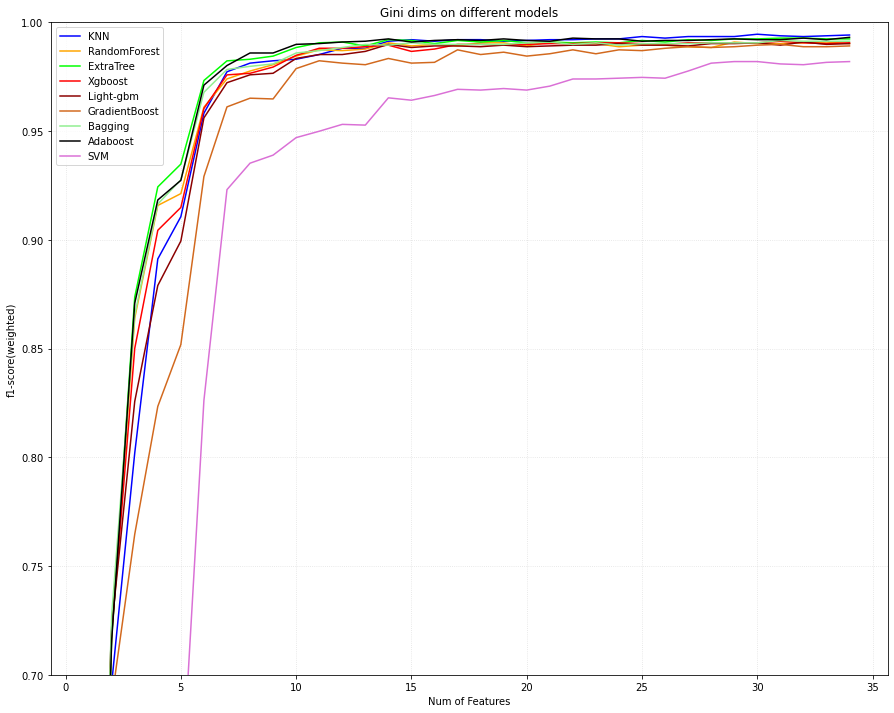

In [54]:


gini_knn_1 = [0.36389, 0.69603, 0.802, 0.89126, 0.91069, 0.95827, 0.97733, 0.98131, 0.98238, 0.9831, 0.98525, 0.98813, 0.98813, 0.99137, 0.99209, 0.99138, 0.99209, 0.9921, 0.99138, 0.99174, 0.99209, 0.99209, 0.99245, 0.99245, 0.99353, 0.99281, 0.99353, 0.99353, 0.99353, 0.9946, 0.99388, 0.99352, 0.99388, 0.99424]
gini_randomForest_1 = [0.36461, 0.72012, 0.86403, 0.91585, 0.9213, 0.96104, 0.97404, 0.97767, 0.98058, 0.98454, 0.98742, 0.98706, 0.98778, 0.99065, 0.98922, 0.98993, 0.98921, 0.99065, 0.99065, 0.98921, 0.99101, 0.99029, 0.99029, 0.98884, 0.98957, 0.98956, 0.98884, 0.98849, 0.99101, 0.99029, 0.99029, 0.99065, 0.99101, 0.99029]

gini_extratree_1 = [0.36643, 0.7168, 0.87372, 0.92439, 0.93487, 0.97332, 0.98235, 0.98309, 0.98453, 0.98849, 0.99065, 0.99101, 0.98921, 0.99209, 0.99173, 0.99029, 0.99173, 0.99101, 0.99173, 0.99065, 0.99102, 0.99065, 0.99101, 0.99065, 0.99173, 0.99101, 0.99209, 0.99173, 0.99245, 0.99245, 0.99281, 0.99281, 0.99245, 0.99245]

gini_xgboost_1= [0.44087, 0.71871, 0.8501, 0.90442, 0.91493, 0.96046, 0.9759, 0.97663, 0.9795, 0.98489, 0.98814, 0.98814, 0.98886, 0.98957, 0.9867, 0.98778, 0.98993, 0.98993, 0.98957, 0.98993, 0.99029, 0.99029, 0.99065, 0.99065, 0.99029, 0.98993, 0.99065, 0.99065, 0.99065, 0.99064, 0.99136, 0.99065, 0.99029, 0.99065]

gini_light_gbm_1 = [0.45819, 0.72205, 0.82574, 0.87904, 0.89948, 0.95613, 0.97231, 0.97593, 0.97664, 0.98347, 0.98525, 0.98526, 0.9867, 0.98993, 0.9885, 0.98922, 0.98922, 0.98886, 0.98958, 0.98886, 0.98922, 0.98957, 0.98957, 0.99029, 0.98958, 0.98957, 0.98921, 0.99029, 0.99029, 0.99065, 0.98957, 0.99101, 0.98993, 0.99029]


gini_gradientBoosting_1 = [0.4542, 0.68838, 0.76465, 0.82343, 0.85187, 0.92917, 0.96118, 0.96518, 0.96483, 0.9788, 0.98239, 0.98131, 0.98058, 0.98345, 0.98131, 0.98167, 0.98741, 0.98526, 0.98634, 0.98454, 0.98562, 0.98742, 0.98561, 0.98742, 0.98705, 0.98813, 0.98886, 0.9885, 0.98885, 0.98957, 0.98993, 0.98886, 0.98885, 0.98922]

gini_bagging_1 = [0.38906, 0.72733, 0.86543, 0.91649, 0.92767, 0.96789, 0.97839, 0.97983, 0.98094, 0.98597, 0.98705, 0.9885, 0.98993, 0.98957, 0.99065, 0.98993, 0.98993, 0.98992, 0.98992, 0.99065, 0.99101, 0.98992, 0.99065, 0.98956, 0.99029, 0.99029, 0.99029, 0.99065, 0.99065, 0.99065, 0.99173, 0.99137, 0.99137, 0.99137]

gini_adaboost_1 = [0.36624, 0.71604, 0.87094, 0.91838, 0.92739, 0.97119, 0.9802, 0.98597, 0.98597, 0.98994, 0.9903, 0.99102, 0.99138, 0.99245, 0.99101, 0.99174, 0.99209, 0.99173, 0.99245, 0.99173, 0.99137, 0.99281, 0.99245, 0.99245, 0.99137, 0.99173, 0.99173, 0.99209, 0.99245, 0.99209, 0.99209, 0.99281, 0.99209, 0.99317]

gini_svm_1 = [0.32487, 0.46464, 0.50728, 0.643, 0.64162, 0.82615, 0.92312, 0.93529, 0.93899, 0.94705, 0.94998, 0.95314, 0.9528, 0.96534, 0.96425, 0.96642, 0.96926, 0.96891, 0.96962, 0.96891, 0.97073, 0.97401, 0.97402, 0.97438, 0.97475, 0.97437, 0.97767, 0.98129, 0.98202, 0.98202, 0.98094, 0.98058, 0.98166, 0.98202]

gini_logistic_regression_1 = [0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838, 0.21838]



x = [i for i in range(1,len(gini))]
plt.figure(figsize=(15,12))
plt.title("Gini dims on different models")
# 1
plt.plot(x, gini_knn_1, color='blue', label="KNN")
# 2
plt.plot(x, gini_randomForest_1, color='Orange', label="RandomForest")
# 3
plt.plot(x, gini_extratree_1, color='Lime', label="ExtraTree")
# 4
plt.plot(x, gini_xgboost_1, color='Red', label="Xgboost")
# 5
plt.plot(x, gini_light_gbm_1, color='DarkRed', label="Light-gbm")
# 6
plt.plot(x, gini_gradientBoosting_1, color='Chocolate', label="GradientBoost")
# 7
plt.plot(x, gini_bagging_1, color='lightgreen', label="Bagging")
# 8
plt.plot(x, gini_adaboost_1, color='black', label="Adaboost")
# 9
plt.plot(x, gini_svm_1, color='Orchid', label="SVM")
# 10
# plt.plot(x, gini_logistic_regression_1, color='lightblue', label="LogisticRegression")
# ##############
plt.legend()
plt.grid(alpha=0.4,linestyle=':')

plt.xlabel("Num of Features")
# plt.xticks(x, random_sizes, rotation=0)
plt.ylabel("f1-score(weighted)")
plt.ylim(0.7,1)
# plt.savefig('gini.png')
plt.show()